# Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Read the dataset

In [2]:
df = pd.read_csv("DoctorVisits-DA.csv")

In [7]:
df.head()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no


In [4]:
df.head(15)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


# Display complete information about the columns of the dataset(column name,count,data types and overall memory usage)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


# Find Out the total no. of people based on their count of illness

In [13]:
df["illness"].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

In [14]:
df["gender"].value_counts()

gender
female    2702
male      2488
Name: count, dtype: int64

# Visualize and analyse the maximum, minimum and medium income

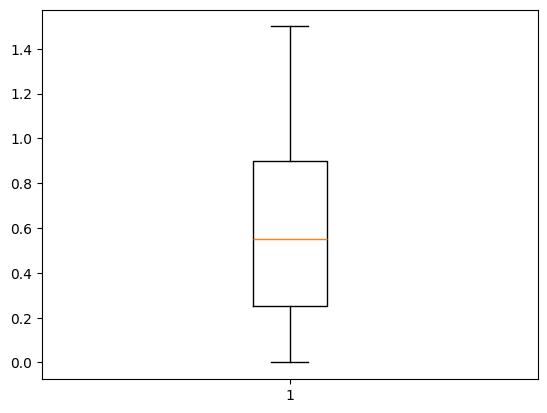

In [15]:
y = list(df.income)
plt.boxplot(y)
plt.show()

# Find out the no. of days of reduced activity of male and female seperatly due to illenes 

In [ ]:
df.groupby(['gender','reduced']).mean()

# Visualize is there is any missing values in the dataset based on the heat map

<Axes: >

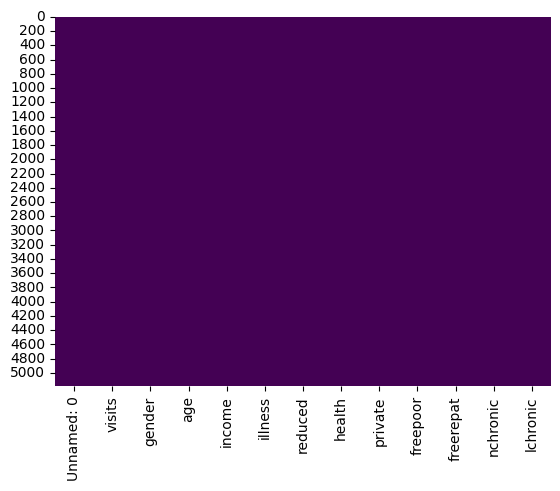

In [24]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

# Finding out the correlation between variables in the given dataset correlation between different variable

In [ ]:
plt.figure(figsize=(10,10)) 
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

# Analyse how the income of a patient affects the no. of visits to the hospital

Text(0, 0.5, 'visits')

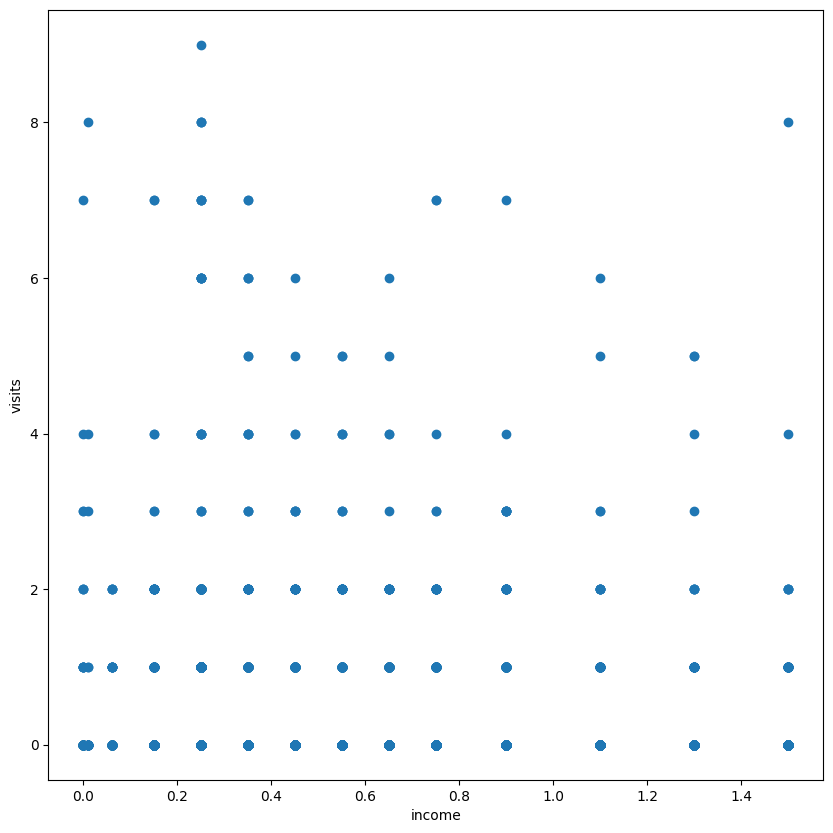

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(x='income',y='visits',data=df)
plt.xlabel('income')
plt.ylabel('visits')

# Count and visualize the number of males and females affected by illness

<Axes: xlabel='gender', ylabel='Count'>

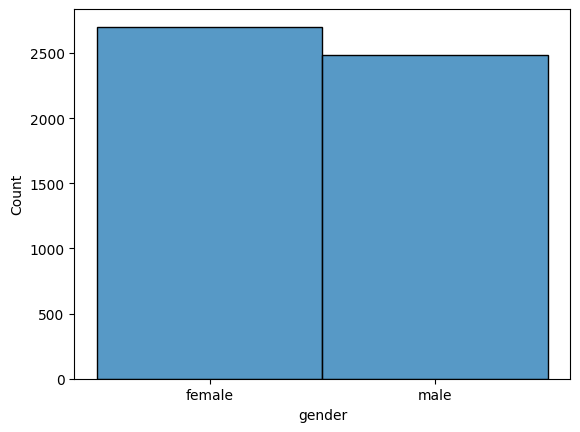

In [33]:
sns.histplot(df.gender,bins=2)

# problem statement :-  Visualize the Percentage of People getting Govt. health insurance due to low income, due to old age. Also calculate the Percentage of People having Private Health Insurance.
# Analysing the dataset based on this problem statement

# Calculate percentages

In [5]:
total_people = len(df)
freepoor_pct = (df['freepoor'] == 'yes').mean() * 100
freerepat_pct = (df['freerepat'] == 'yes').mean() * 100
private_pct = (df['private'] == 'yes').mean() * 100

print("Percentage of people with:")
print(f"Government insurance due to low income: {freepoor_pct:.2f}%")
print(f"Government insurance due to old age: {freerepat_pct:.2f}%")
print(f"Private health insurance: {private_pct:.2f}%")

Percentage of people with:
Government insurance due to low income: 4.28%
Government insurance due to old age: 21.02%
Private health insurance: 44.28%


# 1. Bar plot of insurance types

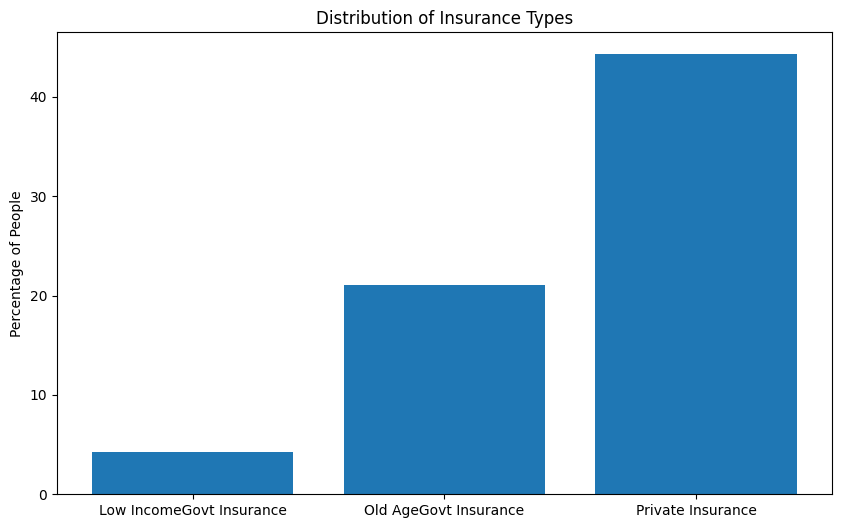

In [6]:
plt.figure(figsize=(10, 6))
insurance_data = [freepoor_pct, freerepat_pct, private_pct]
insurance_labels = ['Low Income\
Govt Insurance', 'Old Age\
Govt Insurance', 'Private Insurance']
plt.bar(insurance_labels, insurance_data)
plt.title('Distribution of Insurance Types')
plt.ylabel('Percentage of People')
plt.xticks(rotation=0)
plt.show()

# 2. Pie chart for government insurance due to low income

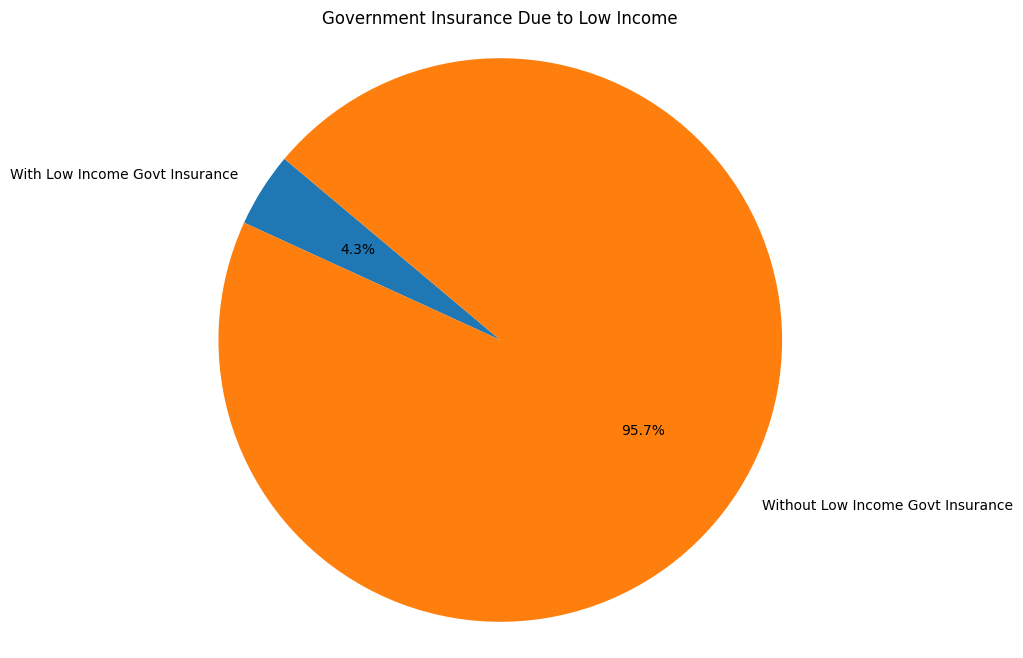

In [8]:
plt.figure(figsize=(8, 8))
labels = ['With Low Income Govt Insurance', 'Without Low Income Govt Insurance']
sizes = [freepoor_pct, 100 - freepoor_pct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Government Insurance Due to Low Income')
plt.axis('equal')
plt.show()

# 3. Pie chart for government insurance due to old age

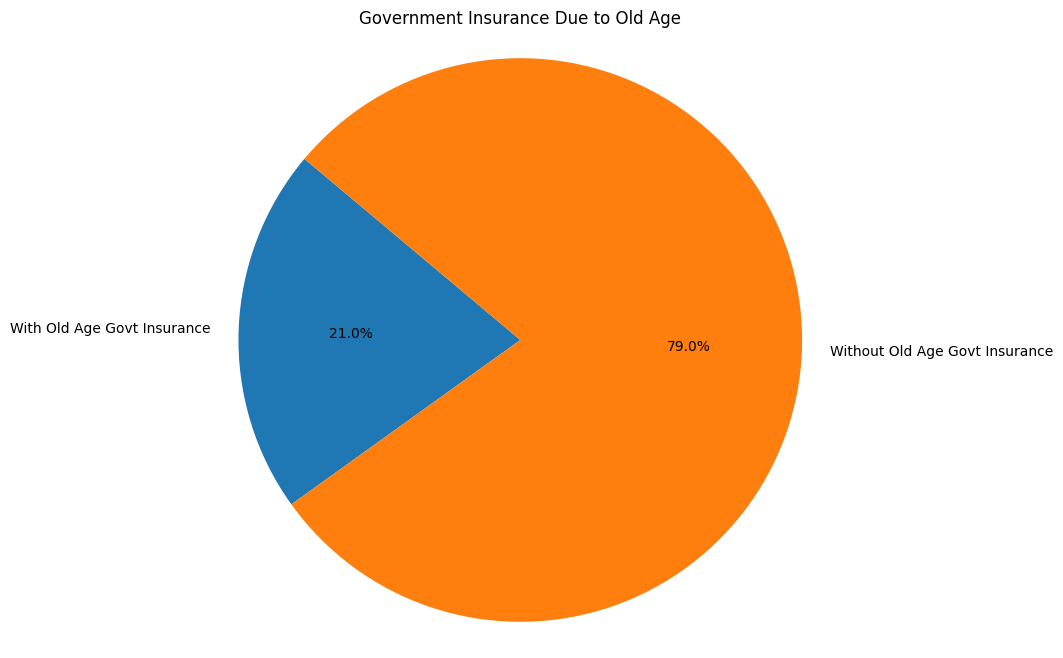

In [9]:
plt.figure(figsize=(8, 8))
labels = ['With Old Age Govt Insurance', 'Without Old Age Govt Insurance']
sizes = [freerepat_pct, 100 - freerepat_pct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Government Insurance Due to Old Age')
plt.axis('equal')
plt.show()

# 4. Pie chart for private health insurance

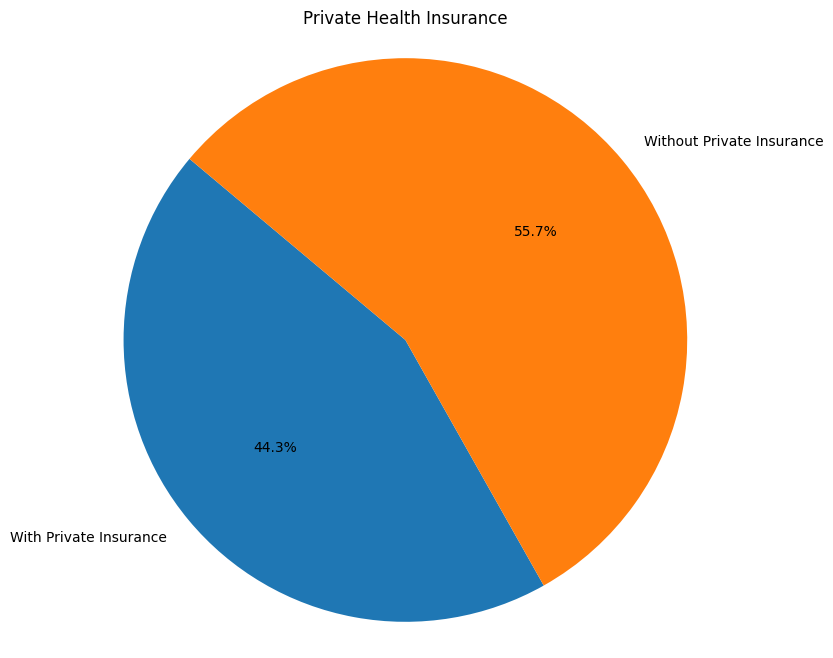

In [10]:
plt.figure(figsize=(8, 8))
labels = ['With Private Insurance', 'Without Private Insurance']
sizes = [private_pct, 100 - private_pct]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Private Health Insurance')
plt.axis('equal')
plt.show()

# 5. Count plot for the number of visits by insurance type

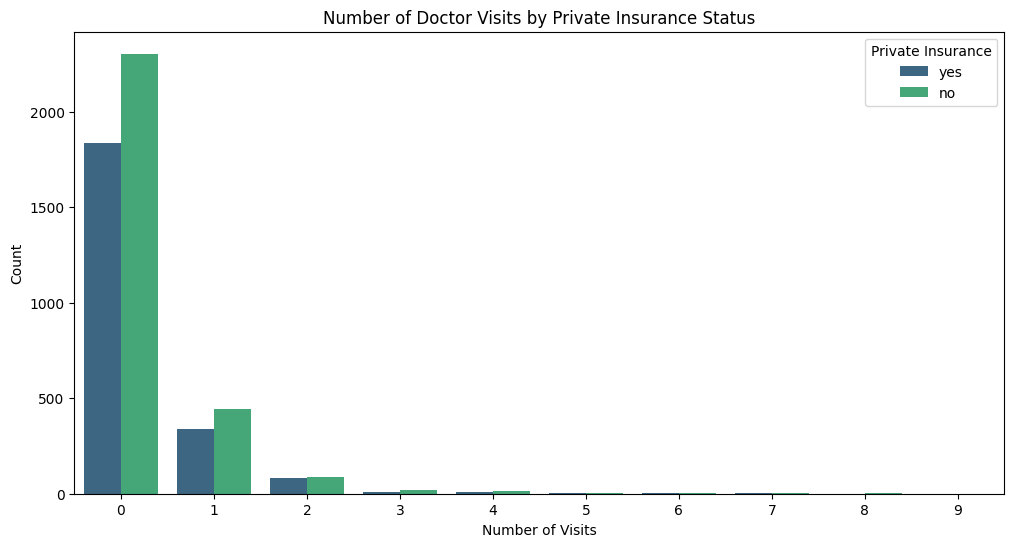

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='visits', hue='private', palette='viridis')
plt.title('Number of Doctor Visits by Private Insurance Status')
plt.xlabel('Number of Visits')
plt.ylabel('Count')
plt.legend(title='Private Insurance')
plt.show()

# Project Description

In [34]:
print("Dataset Overview:")
print("\
Total number of records:", len(df))
print("\
Columns in the dataset:", ", ".join(df.columns.tolist()))

# Calculate some key statistics
print("\
Key Statistics:")
print("Average age:", round(df['age'].mean(), 2))
print("Average income level:", round(df['income'].mean(), 2))
print("Average number of doctor visits:", round(df['visits'].mean(), 2))

# Gender distribution
gender_dist = df['gender'].value_counts(normalize=True) * 100
print("\
Gender Distribution:")
print(gender_dist.round(2))

Dataset Overview:
Total number of records: 5190
Columns in the dataset: Unnamed: 0, visits, gender, age, income, illness, reduced, health, private, freepoor, freerepat, nchronic, lchronic
Key Statistics:
Average age: 0.41
Average income level: 0.58
Average number of doctor visits: 0.3
Gender Distribution:
gender
female    52.06
male      47.94
Name: proportion, dtype: float64
